## Работа над тестовым заданием по классификации типа кузова автомобиля

Работа проводилась по следующим пунктам:
1. Анализ входных данных из датасета.
2. Фильтрация данных.
3. Преобразование переменных.
4. Классификация моделей авто по типу кузова.

Далее в ноутбуке оставил комментарии, которые минимально объясняют мою логику действий.

### 1. Анализ входных данных из датасета

Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

### Сначала нужно указать путь к файлу

In [2]:
df = pd.read_csv('C:/users/Nikolai/notebooks/Test_problem/auto_complectations.csv')

Проверяем содержание датасета

In [3]:
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [4]:
df.tail()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320 л. с.,400 Н·м,автоматическая (8 ступеней),...,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг
1702,Volvo,XC90,T8 AT 7S R-Design,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

In [6]:
df.describe()

,seats,doors
count,1703.000000,1703.000000
mean,5.079272,4.887845
std,0.677096,1.024259
min,1.000000,2.000000
25%,5.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,9.000000,8.000000


После этого шага понял, что нужно будет преобразовывать все записи в столбцах нужно будет преобразовать из категориальных значений переменных в числовые для дальнейшей работы с ними (тип object не будет работать в knn и random forest classifier). Также проверил данные в столбце "type_car" (количество уникальных значений, т.к. это будет целевая переменная, на предсказание которой будем настраивать модели в дальнейшем). В ячейке ниже проверял также все уникальные значения для всех столбцов. Позже заметил, что в столбце "Разгон до сотни" есть 71 значение "нет данных".

In [7]:
columns = df.columns
for column in columns:
    #print(column)
    #print(df[column].unique())
    print(column)
    print((df[column] == "нет данных").sum())

brand
0
model
0
complect
0
type_car
0
seats
0
doors
0
Двигатель
0
Мощность
0
Крутящий момент двигателя
0
Коробка передач
0
Привод
0
Разгон до сотни
71
Максимальная скорость
0
Расход топлива (л/100 км)
город / трасса / смешанный
0
Дорожный просвет
0
Габариты (длина × ширина × высота)
0
Колёсная база
0
Объём багажника
0
Объём багажника максимальный
0
Объём топливного бака
0
Масса автомобиля
0


Дальше решил посмотреть, есть ли отсутствующие данные в других столбцах. На вскидку, есть нулевые значения в следующих столбцах: "Разгон до сотни", "Максимальная скорость", "Расход топлива", "Объем багажника" и "Объем багажника максимальный".
В дальнейшем есть 2 варианта решения данной проблемы: 
1. Найти все данные из открытых источников (спецификация модели с оффициальных сайтов).
2. Убрать данные строки из датасета, чтобы не произошло перекоса по предсказаниям данных классов.

In [8]:
no_data = df[df["Разгон до сотни"] == "нет данных"]
for column in columns:
    print(column)
    print(no_data[column].unique())

brand
['Genesis' 'Jeep' 'Lexus' 'Mitsubishi' 'Suzuki' 'Toyota' 'Volkswagen']
model
['G80' 'Compass' 'Wrangler 2D' 'Wrangler 4D' 'NX' 'L200' 'Jimny'
 'Fortuner' 'Hiace' 'Highlander' 'Hilux' 'Land Cruiser Prado' 'Multivan'
 'Passat']
complect
['Business 2.0L T-GDI 8AT 4WD 197 hp' 'Advance 2.0L T-GDI 8AT 4WD 197 hp'
 'Premium 2.0L T-GDI 8AT 4WD 197 hp' 'Longitude' 'Limited' 'Trailhawk'
 '2.0 AT8 Sport' '2.0 AT8 Sahara' '2.0 AT8 Rubicon' '200 Standart'
 'Invite' 'Invite+' 'Intense' 'Intense AT' 'Instyle AT' 'GL MT' 'GL AT'
 'GLX AT' 'Elegance 2.8D 6AT' 'Prestige 2.8D 6AT' '3.0D MT Standart'
 '3.0D AT Elegance' '3.0D AT Prestige Safety' '3.5 Prestige'
 '3.5 Luxe Safety' 'Standart 2.7 MT' 'Standart 2.4 MT' 'Comfort 2.4 MT'
 '2.8 AT Comfort' '2.8 AT Elegance' '2.8 AT Elegance Plus'
 '2.8 AT Prestige' '2.8 AT Black Onyx 5-seater'
 '2.8 AT Black Onyx 7-seater' 'Trendline 2.0 TDI 102 hp 5MT'
 'Trendline 2.0 TSI 150 hp 6MT' 'Trendline 2.0 TDI 140 hp 6MT'
 'Trendline 2.0 TDI 140 hp 7AMT' 'Comfortl

### Фильтрация данных

В большинстве столбцов данные представлены в виде типа object, поэтому их нужно преобразовать в тип int или float.
прообразовывал столбцы с помощью regex, lambda-функций и функции map.

In [9]:
df['Мощность'] = df['Мощность'].str.extract('(\d+)').astype(int)
df['Двигатель'] = df['Двигатель'].str.extract('(\w+)')
df['Разгон до сотни'] = df['Разгон до сотни'].str.extract('(\d+)').astype(float)
df['Крутящий момент двигателя'] = df['Крутящий момент двигателя'].str.extract('(\d+)').astype(int)
df['Дорожный просвет'] = df['Дорожный просвет'].str.extract('(\d+)').astype(int)
df['Максимальная скорость'] = df['Максимальная скорость'].str.extract('(\d+)').astype(int)
df['Колёсная база'] = df['Колёсная база'].str.extract('(\d+)').astype(int)
df['Объём багажника'] = df['Объём багажника'].str.extract('(\d+)').astype(int)
df['Объём багажника максимальный'] = df['Объём багажника максимальный'].str.extract('(\d+)').astype(int)
df['Объём топливного бака'] = df['Объём топливного бака'].str.extract('(\d+)').astype(int)
df['Масса автомобиля'] = df['Масса автомобиля'].str.extract('(\d+)').astype(int)
df['type_car'] = df['type_car'].str.lower()

In [10]:
df[['город', 'трасса', 'смешанный']] = df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].\
str.split(" / ",expand=True).astype(float)
df[['длина', 'ширина', 'высота']] = df['Габариты (длина × ширина × высота)'].str.split(" × ",expand=True).astype(int)

In [11]:
privod = {'полный': 1, 'передний': 2, 'задний': 3}
engine = {'бензиновый': 1, 'дизельный': 2, 'электрический': 3, 'гибридный': 4}
car = {}

In [12]:
df['Двигатель'].unique()

array(['бензиновый', 'дизельный', 'электрический', 'гибридный'],
      dtype=object)

In [13]:
df['Привод'] = df['Привод'].map(privod)
df['Двигатель'] = df['Двигатель'].map(engine)

Создаем лист с уникальными значениями типа кузова из датасета и смотрим их кол-во.

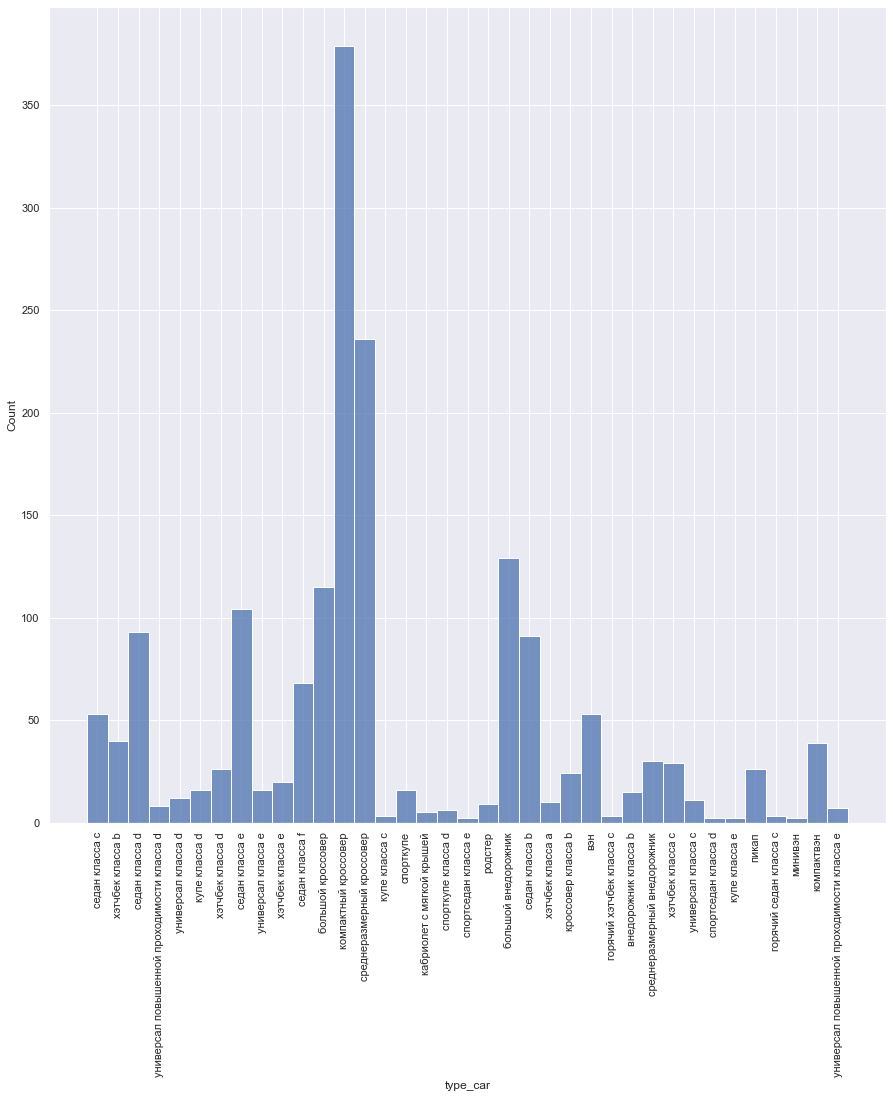

In [14]:
types = df['type_car'].unique().tolist()

sns.set(rc={'figure.figsize':(15,15)});
sns.histplot(df['type_car'].value_counts(), x=df["type_car"] );
plt.xticks(rotation=90);

Далее меняем вид кузова на тип без подкласса (здесь 10 классов).

In [15]:
car_types = dict()
for car_type in df['type_car'].unique():
    if 'седан' in car_type:
        car_types[car_type] = 'седан'
    elif 'хэтчбек' in car_type:
        car_types[car_type] = 'хэтчбек'
    elif 'универсал' in car_type:
        car_types[car_type] = 'универсал'
    elif 'купе' in car_type:
        car_types[car_type] = 'купе'
    elif 'кроссовер' in car_type:
        car_types[car_type] = 'кроссовер'
    elif 'внедорожник' in car_type:
        car_types[car_type] = 'внедорожник'
    elif 'вэн' in car_type:
        car_types[car_type] = 'вэн'
    elif 'родстер' in car_type:
        car_types[car_type] = 'родстер'
    elif 'пикап' in car_type:
        car_types[car_type] = 'пикап'
    elif 'кабриолет' in car_type:
        car_types[car_type] = 'кабриолет' 


'''for car_type in df['type_car'].unique():
    if 'седан' in car_type:
        car_types[car_type] = 'седан'
    elif 'кроссовер' in car_type:
        car_types[car_type] = 'кроссовер'
    elif 'хэтчбек' in car_type:
        car_types[car_type] = 'хэтчбек'
    elif 'универсал' in car_type:
        car_types[car_type] = 'универсал'
    elif 'вэн' in car_type:
        car_types[car_type] = 'вэн'
    elif ('внедорожник' or 'пикап') in car_type:
        car_types[car_type] = 'внедорожник'
    elif 'купе' or 'родстер' or 'кабриолет' in car_type:
        car_types[car_type] = 'купе' '''
    

"for car_type in df['type_car'].unique():\n    if 'седан' in car_type:\n        car_types[car_type] = 'седан'\n    elif 'кроссовер' in car_type:\n        car_types[car_type] = 'кроссовер'\n    elif 'хэтчбек' in car_type:\n        car_types[car_type] = 'хэтчбек'\n    elif 'универсал' in car_type:\n        car_types[car_type] = 'универсал'\n    elif 'вэн' in car_type:\n        car_types[car_type] = 'вэн'\n    elif ('внедорожник' or 'пикап') in car_type:\n        car_types[car_type] = 'внедорожник'\n    elif 'купе' or 'родстер' or 'кабриолет' in car_type:\n        car_types[car_type] = 'купе' "

In [16]:
df['type_car'] = df['type_car'].map(car_types)
df['type_car'].unique()

array(['седан', 'хэтчбек', 'универсал', 'купе', 'кроссовер', 'кабриолет',
       'родстер', 'внедорожник', 'вэн', 'пикап'], dtype=object)

Проверяем выборку на сбалансированность.

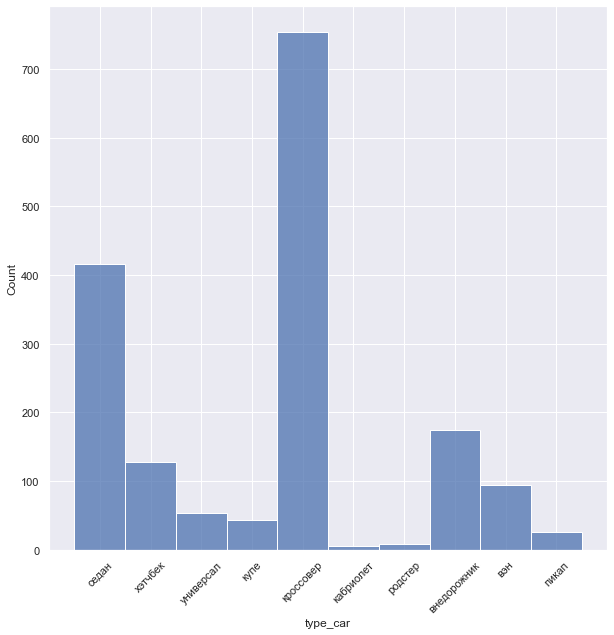

In [17]:
sns.set(rc={'figure.figsize':(10,10)});
sns.histplot(df['type_car'].value_counts(), x=df["type_car"] );
plt.xticks(rotation=45);

Видим, что выборка получается очень несбалансированной. Есть 2 возможных варианта: сделать все классы одного размера с уменьшением или сделать все классы одного размера с увеличением малых классов. Я выбрал второй вариант.

In [18]:
df_1 = df[df['type_car'] == 'хэтчбек']
df_2 = df[df['type_car'] == 'универсал']
df_3 = df[df['type_car'] == 'купе']
df_4 = df[df['type_car'] == 'внедорожник']
df_5 = df[df['type_car'] == 'вэн']
df_6 = df[df['type_car'] == 'кабриолет']
df_7 = df[df['type_car'] == 'родстер']
df_8 = df[df['type_car'] == 'пикап']

    
df = df.append([df_1]*2,ignore_index=True)
df = df.append([df_2]*8,ignore_index=True)
df = df.append([df_3]*10,ignore_index=True)
df = df.append([df_4]*2,ignore_index=True)
df = df.append([df_5]*4,ignore_index=True)
df = df.append([df_6]*15,ignore_index=True)
df = df.append([df_7]*15,ignore_index=True)
df = df.append([df_8]*15,ignore_index=True)

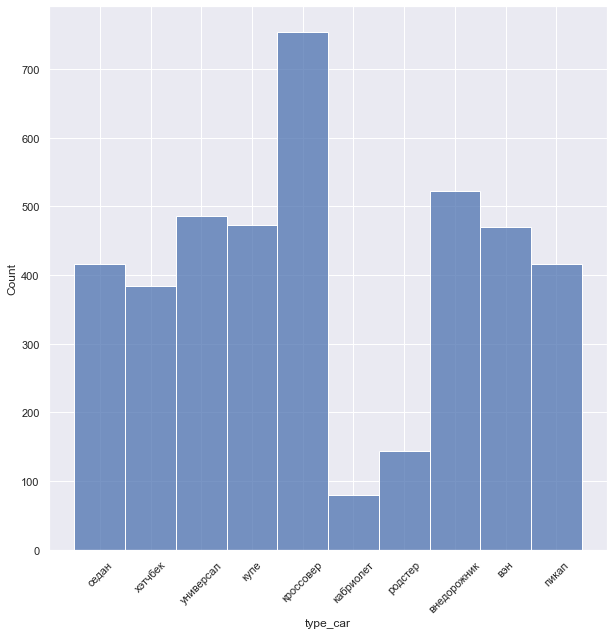

In [19]:
sns.set(rc={'figure.figsize':(10,10)});
sns.histplot(df['type_car'].value_counts(), x=df["type_car"] );
plt.xticks(rotation=45);

Проверяем как коррелируют атрибуты между собой.

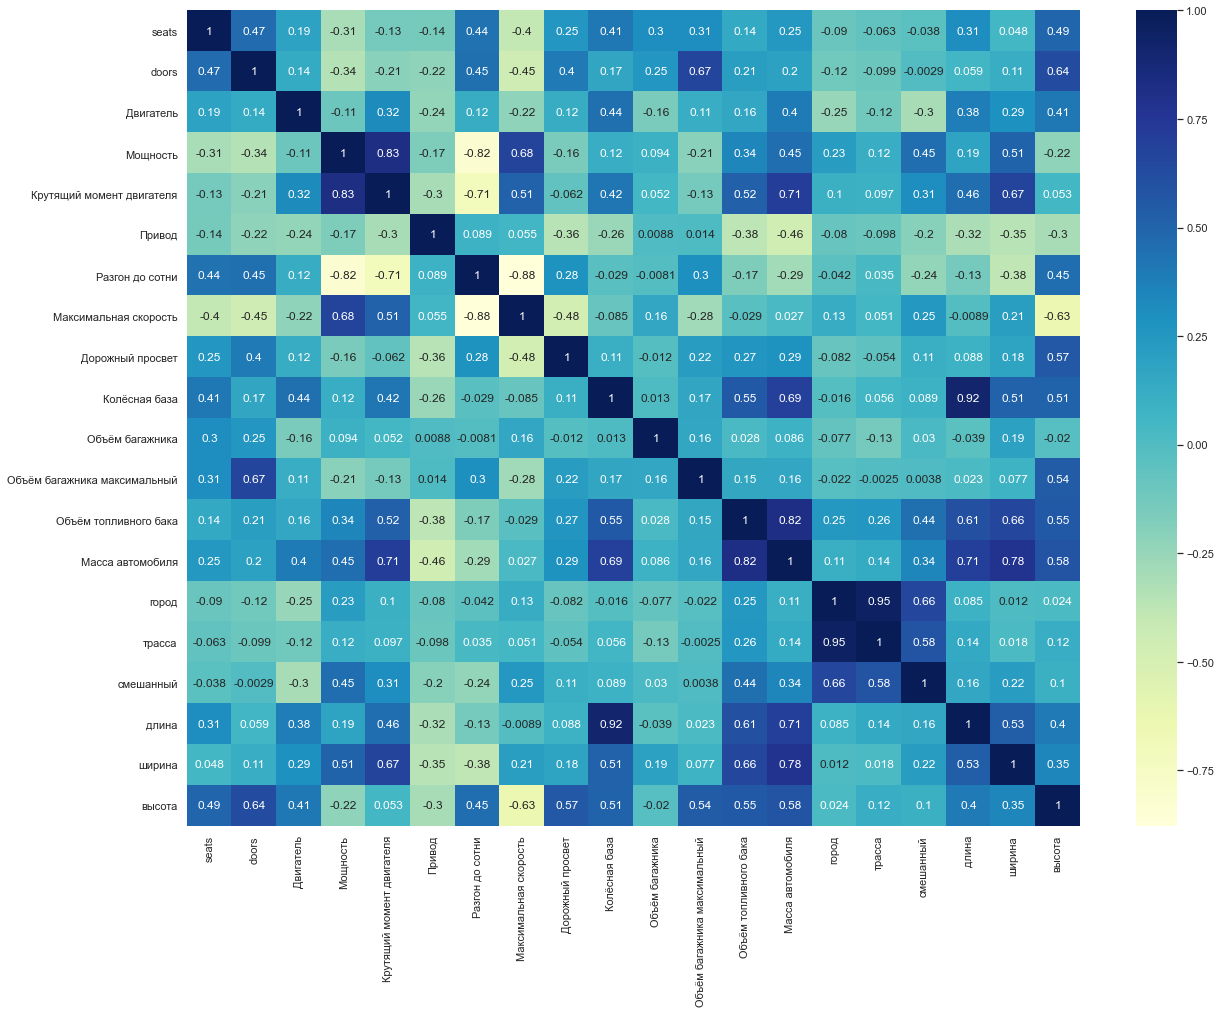

In [20]:
sns.set(rc={'figure.figsize':(20,15)});
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);


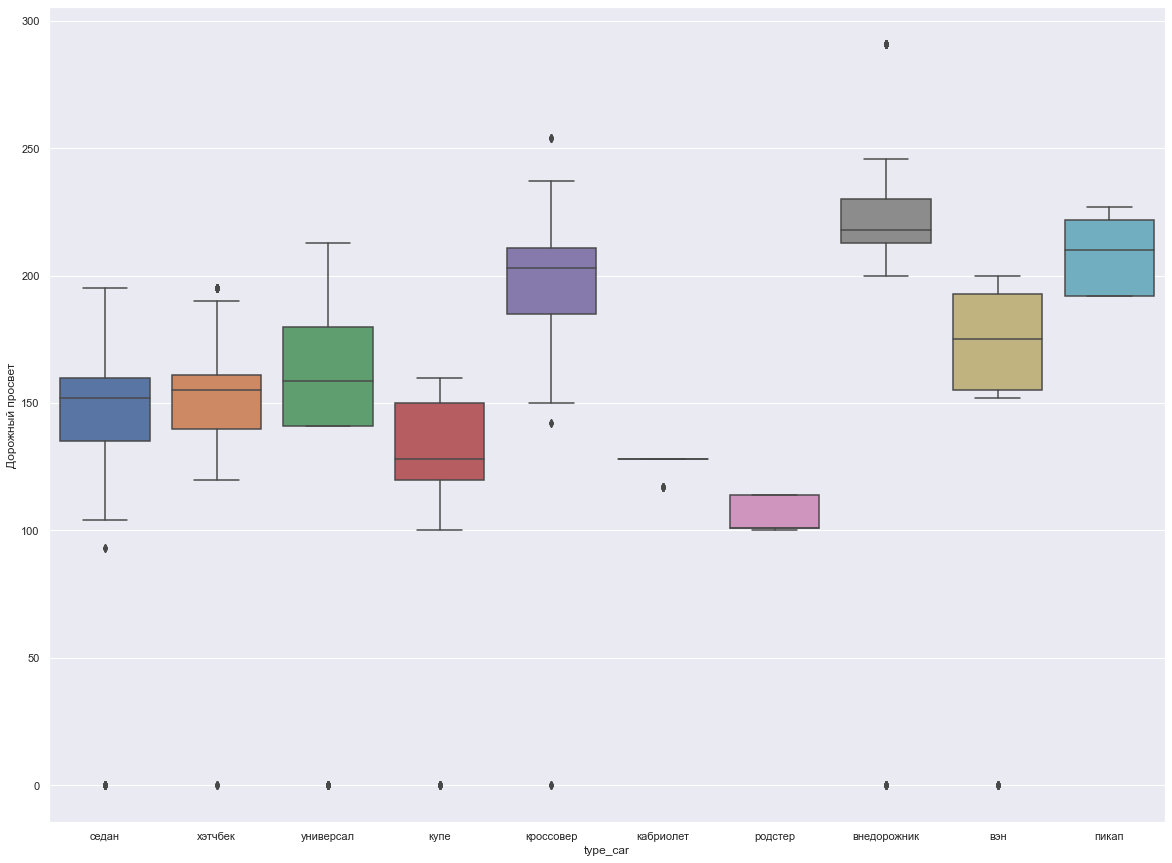

In [21]:
sns.boxplot(x="type_car", y="Дорожный просвет", data=df);

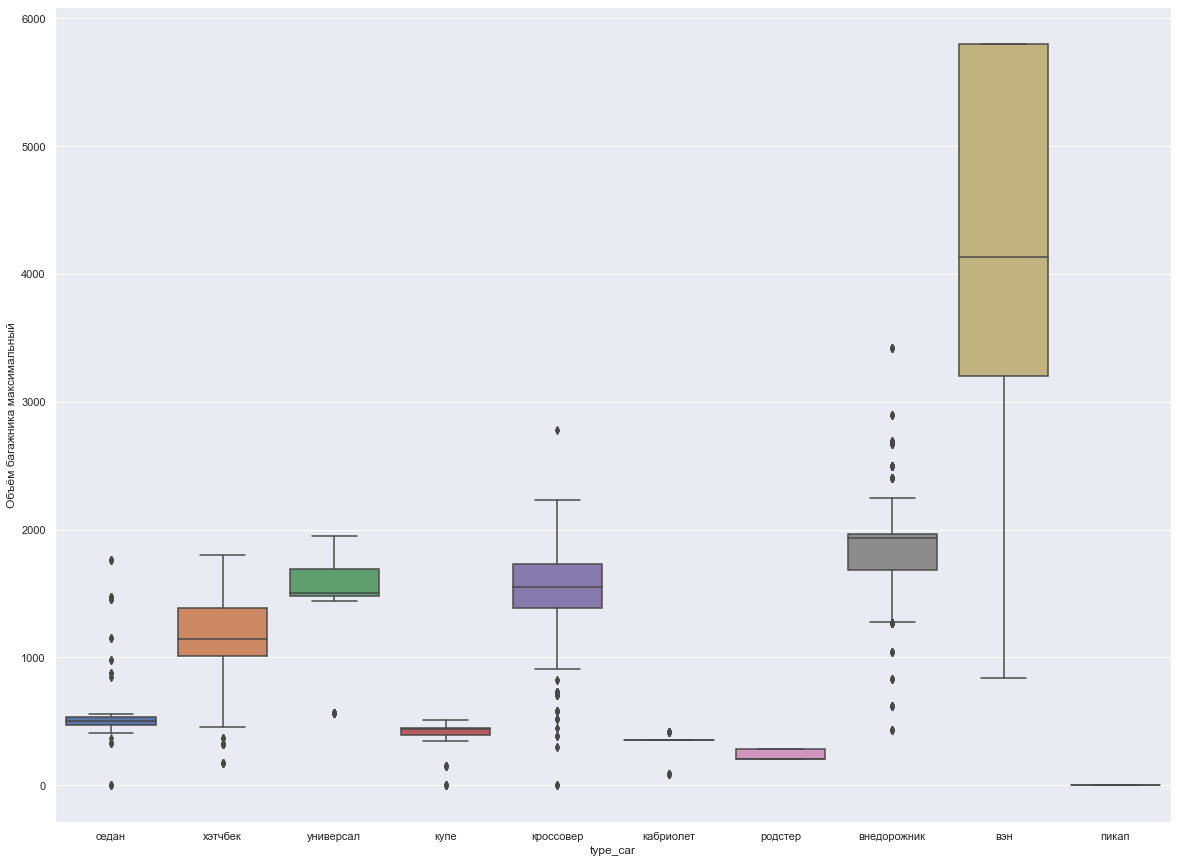

In [22]:
sns.boxplot(x="type_car", y="Объём багажника максимальный", data=df);

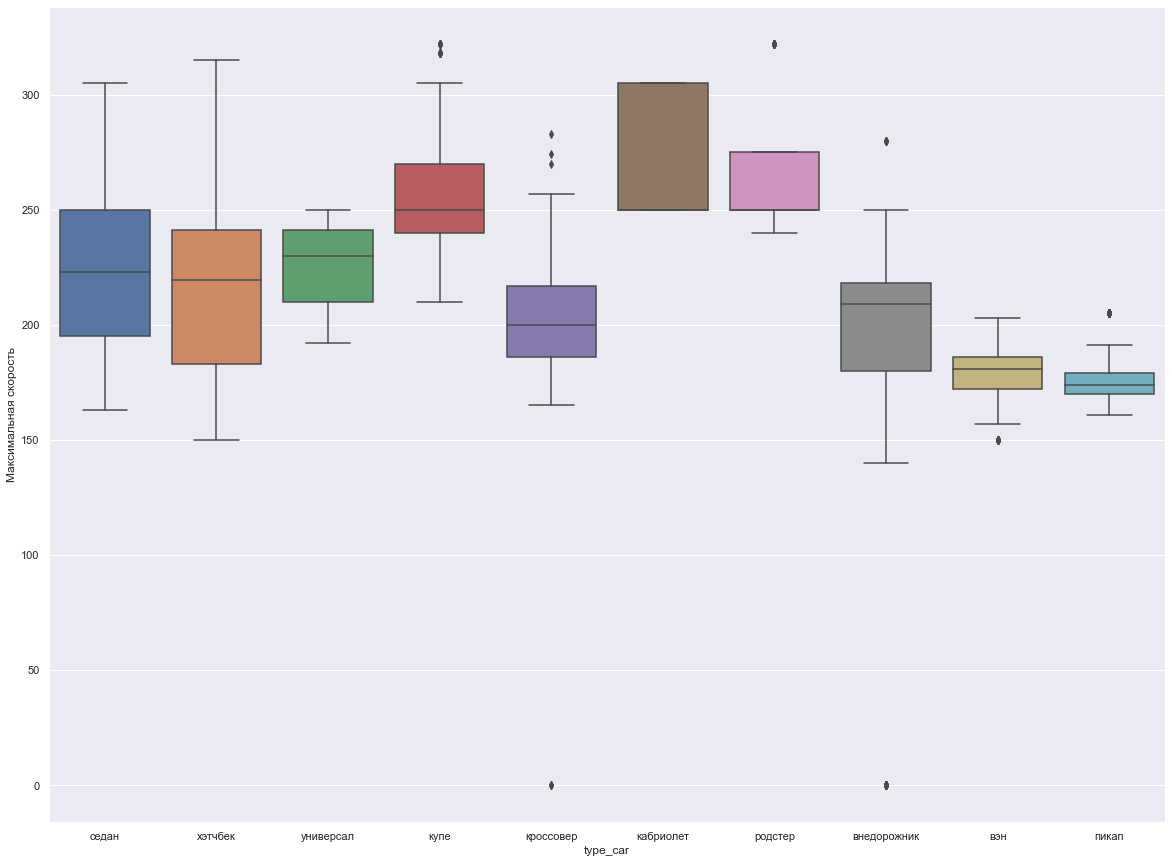

In [23]:
sns.boxplot(x="type_car", y="Максимальная скорость", data=df);

На боксплотах выше видно, что в данных есть вылеты (0, хотя здесь nan) по некоторым столбцам. Например, 0 мм дорожный просвет быть не может, как и максимальная скорость, поэтому здесь удаляем данные значения. Далее еще раз смотрим на конечный результат преобразований.

In [24]:
#df['Дорожный просвет'][(df['type_car'] == 'внедорожник') & (df['Дорожный просвет'] != 0)].median()
#df['Дорожный просвет'][(df['type_car'] == 'кроссовер') & (df['Дорожный просвет'] != 0)].median()

In [25]:
df.fillna(0, inplace=True)
#for column in columns:
    #df = df[(df[column] != 0)]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   brand                                                 4145 non-null   object 
 1   model                                                 4145 non-null   object 
 2   complect                                              4145 non-null   object 
 3   type_car                                              4145 non-null   object 
 4   seats                                                 4145 non-null   int64  
 5   doors                                                 4145 non-null   int64  
 6   Двигатель                                             4145 non-null   int64  
 7   Мощность                                              4145 non-null   int32  
 8   Крутящий момент двигателя                             4145

Создаем матрицу с независимыми переменными Х и вектор-ответ у. Также делим выборку на ренировочную и тестовую. Сравниваем размерности выборок. 

In [26]:
y = df['type_car']
X = df.drop(['type_car', 'brand', 'model', 'complect', 'Коробка передач', 'Расход топлива (л/100 км)\n\
город / трасса / смешанный', 'Габариты (длина × ширина × высота)'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
X_train.shape, X_test.shape


((2777, 20), (1368, 20))

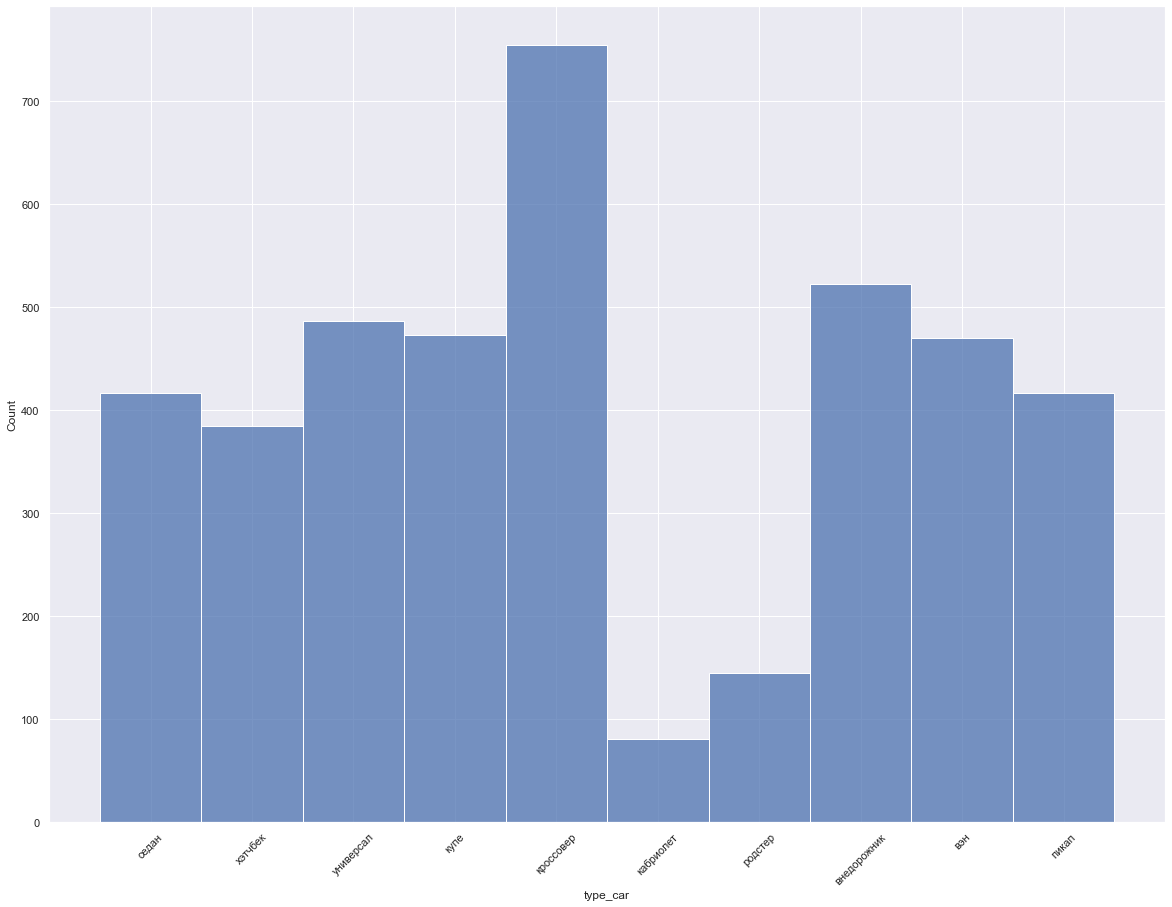

In [27]:
sns.histplot(df['type_car'].value_counts(), x=df["type_car"] );
plt.xticks(rotation=45);

In [28]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2777 entries, 88 to 1146
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   seats                         2777 non-null   int64  
 1   doors                         2777 non-null   int64  
 2   Двигатель                     2777 non-null   int64  
 3   Мощность                      2777 non-null   int32  
 4   Крутящий момент двигателя     2777 non-null   int32  
 5   Привод                        2777 non-null   int64  
 6   Разгон до сотни               2777 non-null   float64
 7   Максимальная скорость         2777 non-null   int32  
 8   Дорожный просвет              2777 non-null   int32  
 9   Колёсная база                 2777 non-null   int32  
 10  Объём багажника               2777 non-null   int32  
 11  Объём багажника максимальный  2777 non-null   int32  
 12  Объём топливного бака         2777 non-null   int32  
 13  Ма

### 4. Классификация автомобилей по типу кузовов

Попробовал 2 модели: Random Forest Classifier и K Near Neighbours.

In [29]:
clf = RandomForestClassifier(random_state=4)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [30]:
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.9985605029489921

Создаем простую функцию для K-fold cross validation для random forest

In [31]:
def mean_score_rf(X, y):
    
    score_mean = list()
    kfold = KFold(n_splits=5)
    
    for train, test in kfold.split(X):
        #print(train, test)
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        clf.fit(X_train, y_train)
        score_mean.append(clf.score(X_test, y_test))
        
    return np.mean(score_mean)

mean_score_rf(X_train, y_train)


0.9985605029489921

In [32]:
clf.score(X_test, y_test)

0.9992690058479532

In [33]:
y_pred_rf = clf.predict(X_test)

#### Пробуем алгоритм К ближайших соседей

Количество кластеров должно быть равно количеству классов (в идеале)

In [34]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [35]:
def mean_score_knn(X, y):
    
    score_mean = list()
    kfold = KFold(n_splits=5)
    
    for train, test in kfold.split(X):
        #print(train, test)
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        neigh.fit(X_train, y_train)
        score_mean.append(neigh.score(X_test, y_test))
        
    return np.mean(score_mean)

mean_score_knn(X_train, y_train)

0.9675902521226263

In [36]:
scores = cross_val_score(neigh, X_train, y_train, cv=5)
scores.mean()

0.9657903947112579

In [37]:
neigh.score(X_test, y_test)

0.9546783625730995

In [38]:
y_pred_knn = neigh.predict(X_test)

Меняем количество кластеров

In [39]:
k_range = range(1, 31)


k_scores = []


for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    
    k_scores.append(scores.mean())
print(k_scores)

[0.9945991221463263, 0.9924369529647041, 0.9884736254317845, 0.9837921720385424, 0.9805521647663819, 0.9747863802820559, 0.9711866607796795, 0.9607472145027659, 0.9495857465652027, 0.9434576526504429, 0.9355322961847131, 0.9276108355193102, 0.9236488065864998, 0.9175272056722854, 0.912117237617848, 0.9041905825520089, 0.900236345219853, 0.8926707009843389, 0.889790405942394, 0.8887060748513103, 0.8807794197854714, 0.8779004233436355, 0.8764602758226632, 0.8714139157987688, 0.8710555021686621, 0.8692543438173648, 0.866736358205854, 0.8627717320728255, 0.8627717320728255, 0.8602537464613146]


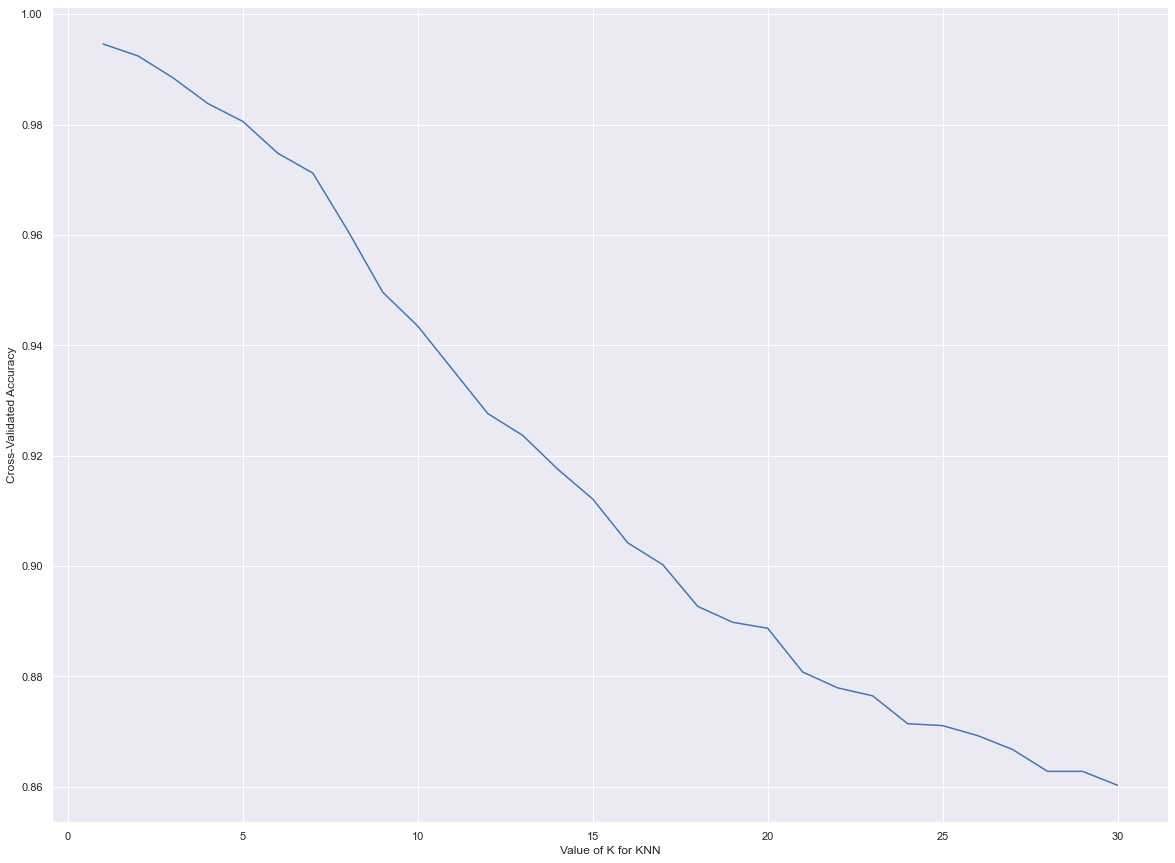

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

#### Пробуем XGboost

С XGBoost никогда до этого не работал, 

In [41]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
def mean_score_xgboost(X, y):
    
    score_mean = list()
    kfold = KFold(n_splits=5)
    
    for train, test in kfold.split(X):
        #print(train, test)
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        xgboost.fit(X_train, y_train)
        score_mean.append(xgboost.score(X_test, y_test))
        
    return np.mean(score_mean)

mean_score_xgboost(X_train, y_train)

[01:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.9974807181282003

In [43]:
scores = cross_val_score(xgboost, X_train, y_train, cv=5)
scores.mean()

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.997840430358416

In [44]:
xgboost.score(X_test, y_test)

0.9978070175438597

In [45]:
y_pred_xgboost = xgboost.predict(X_test)

Последовательность алгоритмов следующая: RF, XGBoost, KNN



In [46]:
df_new_10 = X_test
df_new_10['Ground truth'] = y_test
df_new_10['Random Forest prediction'] = y_pred_rf
df_new_10['KNN prediction'] = y_pred_knn
df_new_10['XGBoost prediction'] = y_pred_xgboost

<ipython-input-46-56617d50f0f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_10['Ground truth'] = y_test
<ipython-input-46-56617d50f0f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_10['Random Forest prediction'] = y_pred_rf
<ipython-input-46-56617d50f0f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [47]:
df_new_10.head()

,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Привод,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,...,город,трасса,смешанный,длина,ширина,высота,Ground truth,Random Forest prediction,KNN prediction,XGBoost prediction
4006,5,4,2,180,420,1,10.0,179,192,3097,...,10.1,7.3,8.3,5254,1954,1834,пикап,пикап,пикап,пикап
158,5,5,1,354,500,1,5.0,250,169,2819,...,10.8,6.8,8.3,4671,1983,1635,кроссовер,кроссовер,кроссовер,кроссовер
1695,7,5,1,320,400,1,6.0,230,237,2984,...,0.0,0.0,8.3,4950,2008,1776,кроссовер,кроссовер,кроссовер,кроссовер
1958,5,5,1,190,320,2,7.0,239,138,2837,...,8.4,5.2,6.4,4862,1871,1450,хэтчбек,хэтчбек,универсал,хэтчбек
3551,4,2,1,530,750,1,3.0,250,128,2822,...,14.9,8.2,10.6,4851,1902,1345,кабриолет,кабриолет,кабриолет,кабриолет


In [48]:
df_new_10.to_excel("Manual observation of results 10 types.xlsx")

In [49]:
df_new_10 = pd.DataFrame()
df_new_10['Ground truth'] = y_test
df_new_10['Random Forest prediction'] = y_pred_rf
df_new_10['KNN prediction'] = y_pred_knn
df_new_10['XGBoost prediction'] = y_pred_xgboost

In [51]:
types = df_new_10["Ground truth"].unique()

print(types, '\n'
    "Ground truth  ", df_new_10['Ground truth'].value_counts().unique(),'\n',\
      "Random forest", df_new_10['Random Forest prediction'].value_counts().unique(),'\n',\
       "KNN          ", df_new_10['KNN prediction'].value_counts().unique(), '\n',\
      "XGBoost      ", df_new_10['XGBoost prediction'].value_counts().unique())


['пикап' 'кроссовер' 'хэтчбек' 'кабриолет' 'внедорожник' 'купе' 'седан'
 'вэн' 'универсал' 'родстер'] 
Ground truth   [263 176 173 156 144 137 130 121  44  24] 
 Random forest [262 177 173 156 144 137 130 121  44  24] 
 KNN           [251 187 183 158 147 140 135  93  44  30] 
 XGBoost       [260 177 173 156 144 137 131 122  44  24]


Видим, что К ближайших соседей значительно уступает в точности.